In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
# Read in the file, “house price dataset.csv”, and create a dataframe.
df = pd.read_csv('house price dataset.csv',header=0)
sns.set(style='whitegrid',context='notebook')

In [3]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [4]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [5]:
missing = df.isnull().sum()
df['Price'].describe()

count    4.999000e+03
mean     1.232020e+06
std      3.531336e+05
min      1.593866e+04
25%      9.975356e+05
50%      1.232466e+06
75%      1.470754e+06
max      2.469066e+06
Name: Price, dtype: float64

In [6]:
df.fillna(value=123177, inplace=True)

In [7]:
# Use the following columns as features: Ave. Area Income, Avg. Area House Age, Avg. Area Number of Rooms, and 
# Area Population. Price is the label or target for the model.
x_income = df['Avg. Area Income']
x_age = df['Avg. Area House Age']
x_rooms = df['Avg. Area Number of Rooms']
x_pop = df['Area Population']
y = df['Price']

In [8]:
X_income = x_income[:,np.newaxis]
X_age = x_age[:,np.newaxis]
X_rooms = x_rooms[:,np.newaxis]
X_pop = x_pop[:,np.newaxis]
y_price = y[:,np.newaxis]

<ipython-input-8-3ec8eb886b0c>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_income = x_income[:,np.newaxis]
<ipython-input-8-3ec8eb886b0c>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_age = x_age[:,np.newaxis]
<ipython-input-8-3ec8eb886b0c>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_rooms = x_rooms[:,np.newaxis]
<ipython-input-8-3ec8eb886b0c>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_pop = x_pop[:,np.newaxis]
<ipyth

In [9]:
y_price.shape

(5000, 1)

In [10]:
# Instantiate a LinearRegression model and set fit_intercept to True.
model = LinearRegression(fit_intercept = True)

In [11]:
# Fit the first 2999 (X[:3000] samples from the data set.
model.fit(X_income[:3000], y_price[:3000])

LinearRegression()

In [12]:
# What are model coefficients and intercept?
model.coef_

array([[21.3283842]])

In [13]:
model.intercept_

array([-228328.0857037])

In [14]:
# Using the model, predict the house price for the remaining samples (X[3000:]).
predict = model.predict(X_income[3000:])
predict

array([[1305580.90303129],
       [1382247.45579202],
       [1187005.46380482],
       ...,
       [1123692.83868285],
       [1222030.432767  ],
       [1168906.77177674]])

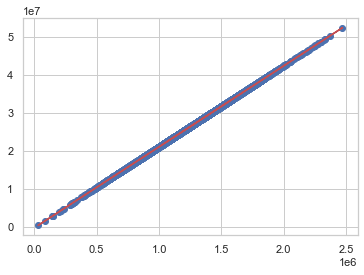

In [15]:
# Create a scatter plot of the predicted house price and the actual house price using the first 2999 samples.

predict1 = model.predict(y_price[:3000])
predict1

plt.scatter(y[:3000],predict1)
plt.plot(y[:3000],predict1,c='r')

In [16]:
# What would you conclude from viewing the plot?

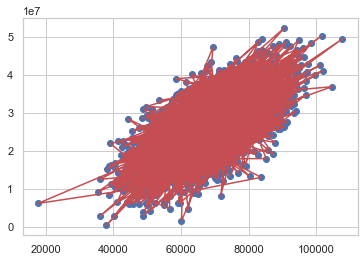

In [17]:
# Create a scatter plot of the ‘Ave Area Income’ and the predicted Price.
plt.scatter(X_income[:3000],predict1)
plt.plot(X_income[:3000],predict1,c='r')

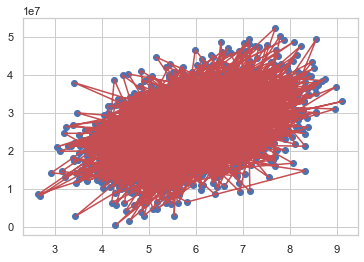

In [18]:
# Create a scatter plot of the ‘Ave Area House Age’ and the predicted Price.
plt.scatter(X_age[:3000],predict1)
plt.plot(X_age[:3000],predict1,c='r')

In [19]:
# Compute the coefficient of determination of the prediction. Hint: use model.score with the first 2999 samples.